<a href="https://colab.research.google.com/github/ParthikB/encryption/blob/master/encryption_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [0]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/encryption/image1.jpg')

height, width, _ = img.shape

original = cv2.resize(img, (width//8, height//8))
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

inImg = outImg = cv2.resize(gray, (width//8, height//8))

Total Pixels : 4800


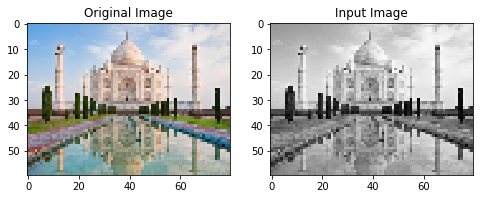

In [4]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inImg, cmap='gray')
plt.title('Input Image')

print('Total Pixels :', np.prod(inImg.shape))

In [0]:
trainSet = [[torch.Tensor(inImg), torch.Tensor(outImg)]]

In [0]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(4800, 4800)
        self.fc2 = nn.Linear(4800, 4800)        
        self.fc3 = nn.Linear(4800, 4800)        
        self.fc4 = nn.Linear(4800, 4800)        
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))        
        x = F.relu(self.fc3(x))        
        x = F.relu(self.fc4(x))
        
        return x

In [38]:
LEARNING_RATE = 0.001 #1e-3
EPOCHS        = 200

net = Net()

# loss_function = nn.SmoothL1Loss()
# Define Optimizer
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

loss_log = []
outputs  = []

# Iteration Begins
for epoch in tqdm(range(EPOCHS)):
    # Iterate over every sample in the batch
    for data in trainSet:
        x, y = data
        x = x/255.0
        y = y/255.0

        net.zero_grad()
        
        #Compute the output
        output = net(x.view(-1, 4800))
        
        # Saving every output image
        img = output.view(60, 80)
        img = img.detach().numpy()
        outputs.append(img)

        # Compute Loss
        loss = F.kl_div(output, y.view(-1, 4800))
        loss_log.append(loss)

        # Backpropagate
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
    # print(loss)


  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1946: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."

100%|██████████| 200/200 [04:50<00:00,  1.45s/it]


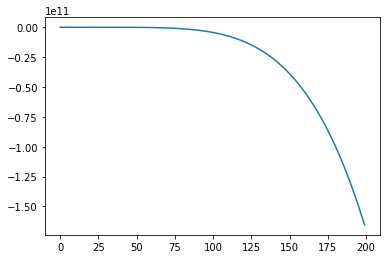

In [39]:
plt.plot(loss_log)

In [40]:
loss_log

[tensor(-0.2523, grad_fn=<KlDivBackward>),
 tensor(-8.5624, grad_fn=<KlDivBackward>),
 tensor(-67.4410, grad_fn=<KlDivBackward>),
 tensor(-268.6132, grad_fn=<KlDivBackward>),
 tensor(-769.0027, grad_fn=<KlDivBackward>),
 tensor(-1804.1256, grad_fn=<KlDivBackward>),
 tensor(-3708.1641, grad_fn=<KlDivBackward>),
 tensor(-6930.5327, grad_fn=<KlDivBackward>),
 tensor(-12060.4229, grad_fn=<KlDivBackward>),
 tensor(-19849.5059, grad_fn=<KlDivBackward>),
 tensor(-31244.3262, grad_fn=<KlDivBackward>),
 tensor(-47411.4414, grad_fn=<KlDivBackward>),
 tensor(-69772.7969, grad_fn=<KlDivBackward>),
 tensor(-100045.4141, grad_fn=<KlDivBackward>),
 tensor(-140267.7812, grad_fn=<KlDivBackward>),
 tensor(-192856.7188, grad_fn=<KlDivBackward>),
 tensor(-260653.6562, grad_fn=<KlDivBackward>),
 tensor(-346955.4688, grad_fn=<KlDivBackward>),
 tensor(-455582.0938, grad_fn=<KlDivBackward>),
 tensor(-590941.2500, grad_fn=<KlDivBackward>),
 tensor(-758049.2500, grad_fn=<KlDivBackward>),
 tensor(-962622.6250, g

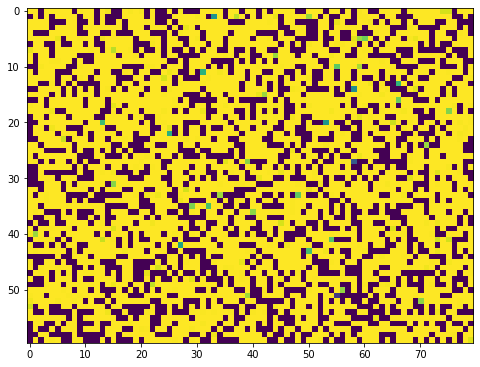

In [43]:
# Converting the tensor into numpy array and reshaping from VECTOR to 2D MATRIX
img = output.view(60, 80)
img = img.detach().numpy()

plt.figure(figsize=(8, 8))
plt.imshow(img)

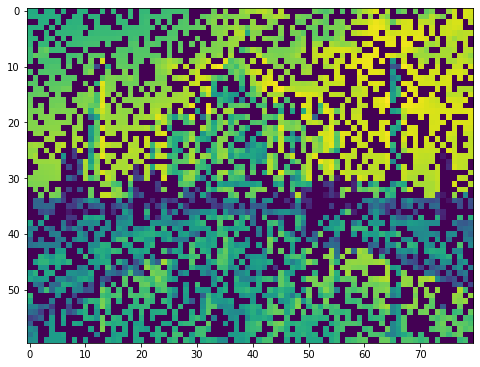

In [19]:
with torch.no_grad():
    for data in trainSet:
        x, y = data
        output = net(x.view(-1, 4800))

img = output.view(60, 80)
img = img.detach().numpy()

plt.figure(figsize=(8, 8))
plt.imshow(img)

In [0]:
np.save('/content/drive/My Drive/Colab Notebooks/encryption/output_images.npy', outputs)
np.save('/content/drive/My Drive/Colab Notebooks/encryption/loss_log.npy', loss_log)

In [0]:
'''
LOGS:

      Loss      |      Remarks
-------------------------------------------------
mse_loss       --> ? (worse than smooth_L1_loss)
smooth_L1_loss --> 0.0726 [learning_rate = 0.001]
kl_div         --> super bad

'''